In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Directory containing the output files
output_dir = './'

# List to store DataFrame objects for each simulation
dfs = []

# Iterate over each output file
for file in os.listdir(output_dir):
    if file.endswith('.txt'):
        # Extract width from filename
        width = file.split('.')[0].split('_')[-1]  # Assuming filename format is 'output_width_{width}.txt'
        
        # Read the data into a DataFrame
        file_path = os.path.join(output_dir, file)
        df = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None,
                         names=['v-sweep','abs(V(alim))','V(drain)', 'V(gate)', 'V(source)', 'V(body)',
                                'I(Vd)', 'I(Vg)', 'I(Vs)', 'I(Vb)'])
        # Add 'W' column to DataFrame
        df['W'] = width
        dfs.append(df)

# Concatenate all DataFrames
all_data = pd.concat(dfs)

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Sankalp\AppData\Local\Temp\ipykernel_18000\205338786.py:15: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None,


In [3]:
all_data

,v-sweep,abs(V(alim)),V(drain),V(gate),V(source),V(body),I(Vd),I(Vg),I(Vs),I(Vb),W
0,25.0,0.00,0.0,0.00,1.1,0.0,1.325261e-04,4.019641e-08,-0.004128,0.003995,135n
1,25.0,0.05,0.0,0.05,1.1,0.0,1.284248e-04,3.306239e-08,-0.004124,0.003995,135n
2,25.0,0.10,0.0,0.10,1.1,0.0,1.240438e-04,2.743963e-08,-0.004120,0.003995,135n
3,25.0,0.15,0.0,0.15,1.1,0.0,1.193692e-04,2.281515e-08,-0.004115,0.003995,135n
4,25.0,0.20,0.0,0.20,1.1,0.0,1.143862e-04,1.888852e-08,-0.004110,0.003995,135n
...,...,...,...,...,...,...,...,...,...,...,...
18,25.0,0.90,0.0,0.90,1.1,0.0,6.543587e-06,-3.616085e-09,-0.003849,0.003842,90n
19,25.0,0.95,0.0,0.95,1.1,0.0,3.543467e-06,-4.303233e-09,-0.003846,0.003842,90n
20,25.0,1.00,0.0,1.00,1.1,0.0,1.731748e-06,-5.133021e-09,-0.003844,0.003842,90n
21,25.0,1.05,0.0,1.05,1.1,0.0,7.886642e-07,-6.543114e-09,-0.003843,0.003842,90n


c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

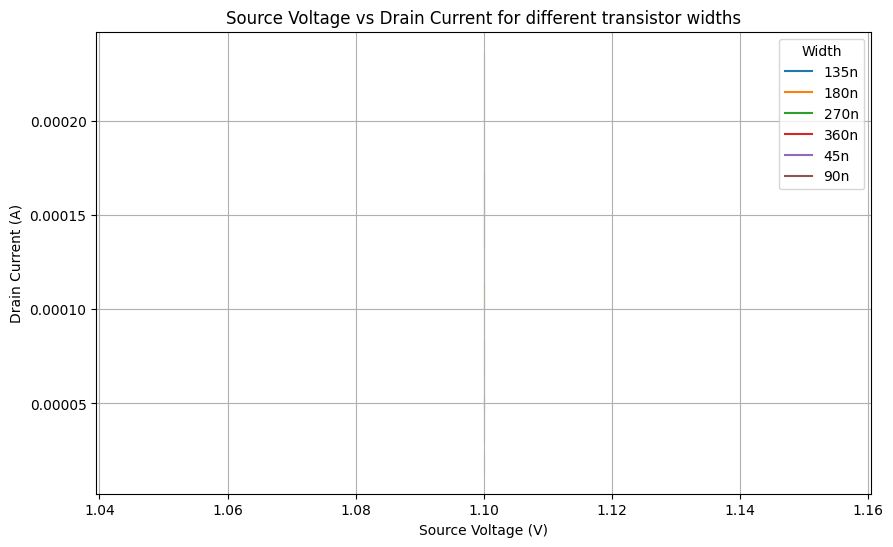

In [4]:
# Plotting V(source) vs I(Vd) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='V(source)', y='I(Vd)', hue='W')
plt.xlabel('Source Voltage (V)')
plt.ylabel('Drain Current (A)')
plt.title('Source Voltage vs Drain Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()

c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

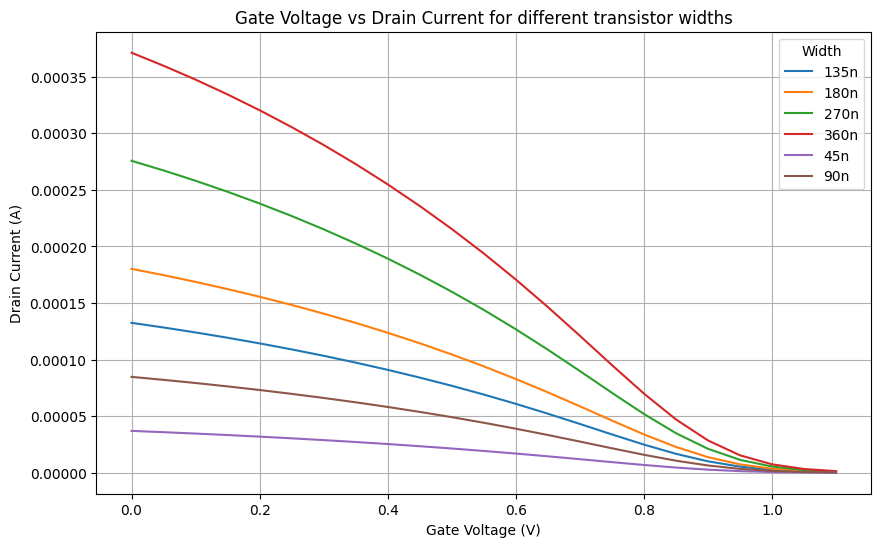

In [5]:
# Plotting V(gate) vs I(Vd) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='V(gate)', y='I(Vd)', hue='W')
plt.xlabel('Gate Voltage (V)')
plt.ylabel('Drain Current (A)')
plt.title('Gate Voltage vs Drain Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()

c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

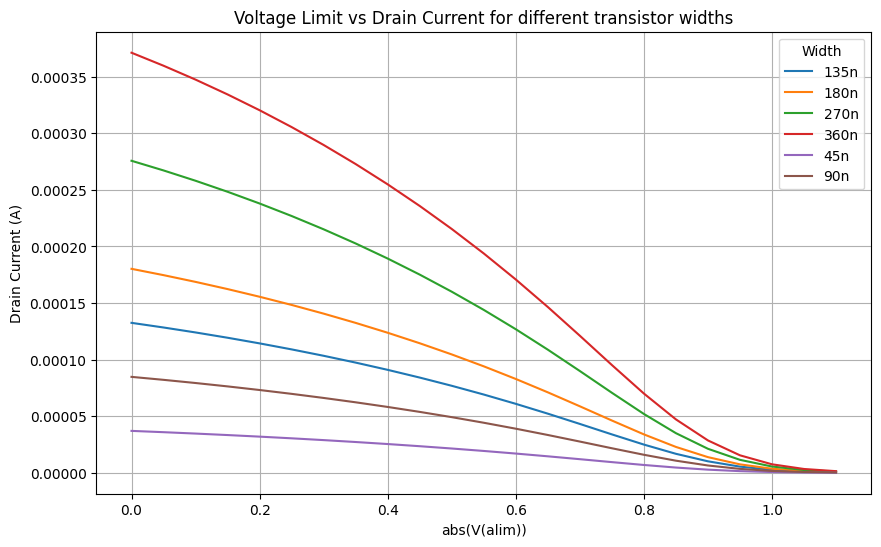

In [6]:
# Plotting abs(V(alim)) vs I(Vd) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='abs(V(alim))', y='I(Vd)', hue='W')
plt.xlabel('abs(V(alim))')
plt.ylabel('Drain Current (A)')
plt.title('Voltage Limit vs Drain Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()

c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Sankalp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

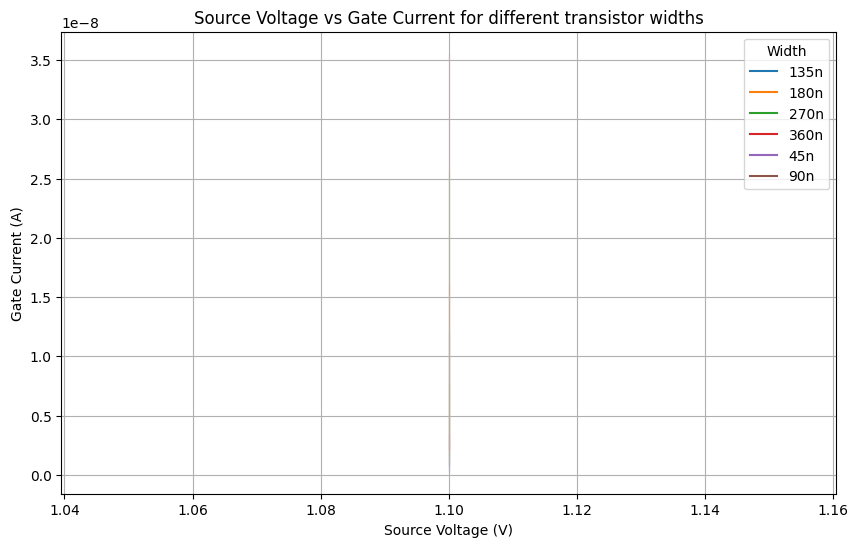

In [7]:
# Plotting V(source) vs I(Vg) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='V(source)', y='I(Vg)', hue='W')
plt.xlabel('Source Voltage (V)')
plt.ylabel('Gate Current (A)')
plt.title('Source Voltage vs Gate Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()